1. Загрузить файл auto.csv
2. Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение)
3. Рассчитать и визуализировать корреляционную матрицу для переменных
4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis
5. Визуализировать несколько взаимосвязей между переменными
6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.
7. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте.

In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

**1. Загрузить файл auto.csv:**

In [6]:
auto = pd.read_csv('C:\\Users\\Dmitry\\Documents\\Учеба\\3 Python и математика для анализа данных\\3.18 Лабораторная 2\\auto.csv')
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-nu

In [8]:
import pandas_profiling
pandas_profiling.ProfileReport(auto)

Number of variables,26
Number of observations,205
Total Missing (%),0.0%
Total size in memory,41.7 KiB
Average record size in memory,208.4 B
Numeric,15
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,1


**2. Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение):**

In [9]:
auto.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
auto.select_dtypes(include='object').mode()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi


In [11]:
horsepower = auto['horsepower']
print('Статистические показатели мощностей двигателей:')
print(f"Медиана: {statistics.median(horsepower)}")
print(f"Мода: {statistics.mode(horsepower)}")
print(f"Математическое ожидание: {round(statistics.mean(horsepower),1)}")
print(f"СКО: {round(statistics.pstdev(horsepower),1)}")
print(f"Минимум: {horsepower.min()}")
print(f"Максимум: {horsepower.max()}")
print(f"Размах: {horsepower.max() - horsepower.min()}")

Статистические показатели мощностей двигателей:
Медиана: 95
Мода: 68
Математическое ожидание: 106.0
СКО: 43.4
Минимум: 48
Максимум: 288
Размах: 240


**3. Рассчитать и визуализировать корреляционную матрицу для переменных:**

C:\Users\Dmitry\Anaconda3\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


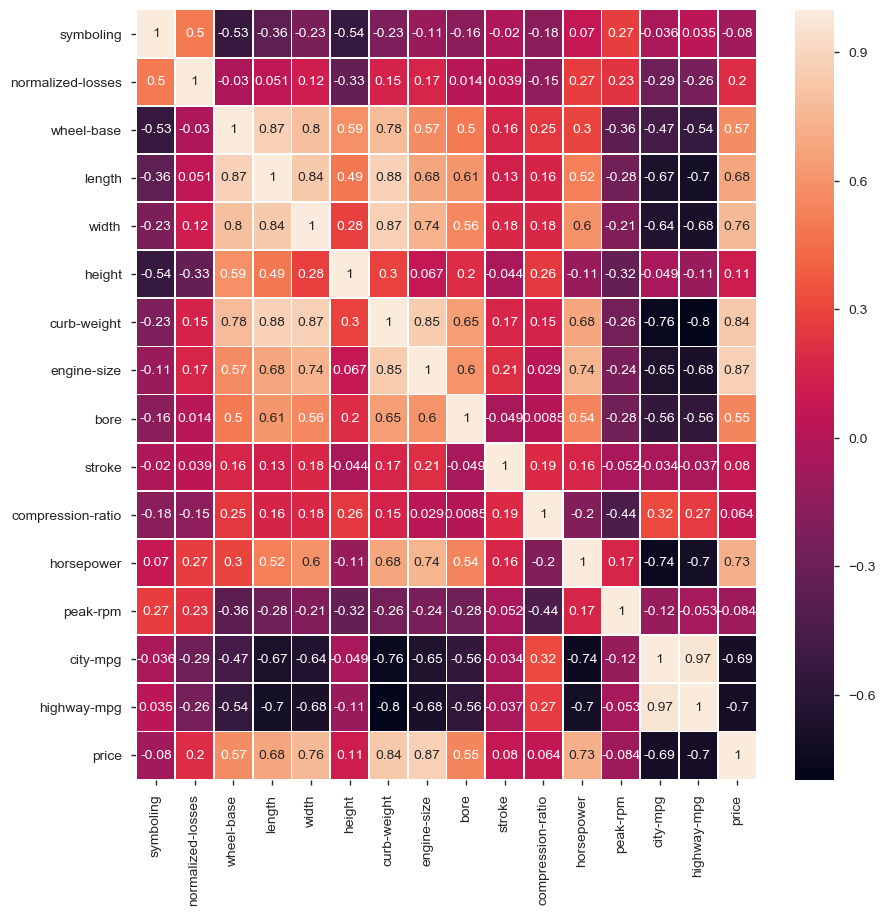

In [28]:
sns.heatmap(auto.corr(), annot=True, linewidths=0.5)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()
# сильно коррелируют физические параметры машины, а именно: length, wheel-base, width, что вполне логично
# сильная обратная корреляция у расхода топлива (city mpg и highway mpg) с мощностью двигателя

**4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis:**

C:\Users\Dmitry\Anaconda3\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


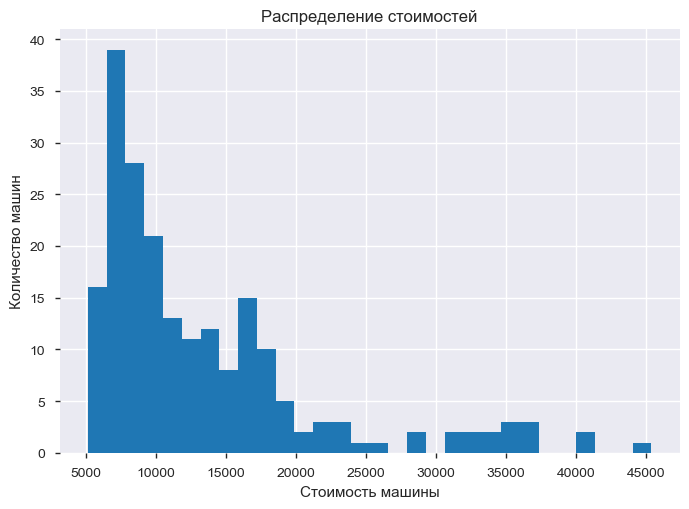

In [13]:
price = auto['price']
plt.hist(price, 30)
plt.xlabel('Стоимость машины')
plt.ylabel('Количество машин')
plt.title('Распределение стоимостей')
plt.show()

In [14]:
from scipy.stats import kurtosis
from scipy.stats import skew
print(f'Kurtosis:{round(kurtosis(price), 1)}')
print(f'Skewness:{round(skew(price), 1)}')

Kurtosis:2.8
Skewness:1.8


**5. Визуализировать несколько взаимосвязей между переменными:**

In [15]:
auto2 = auto.iloc[:,[16,21,22,23,25]]
auto2.head()
# для визуализирования взаимосвязей выбрал параметры: объем двигателя, мощность двигателя, обороты в минуту, расход топлива
# и цена

,engine-size,horsepower,peak-rpm,city-mpg,price
0,130,111,5000,21,13495
1,130,111,5000,21,16500
2,152,154,5000,19,16500
3,109,102,5500,24,13950
4,136,115,5500,18,17450


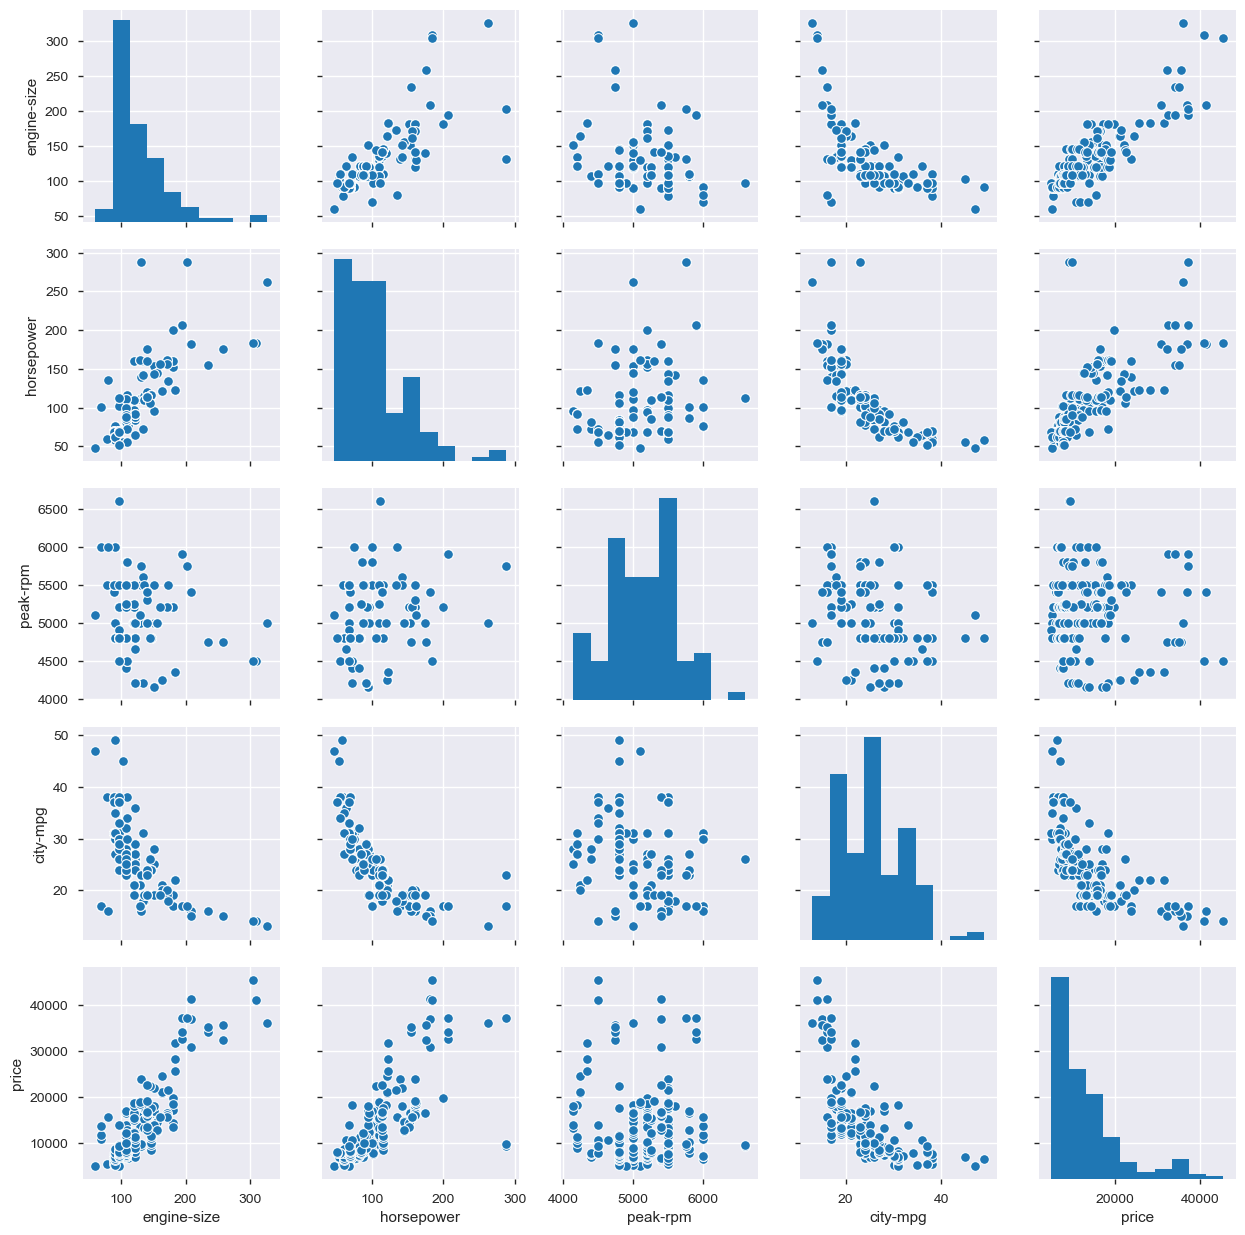

In [16]:
pair_plot = sns.pairplot(auto2)
pair_plot
# объем двигателя имеет сильную взаимосвязь с мощностью и ценой автомобиля и заметную обратную корреляция с расходом топлива

**6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test**

Двигатели с топливной системой 2bbl имеют такой же расход топилва по городу как и mpfi:

In [17]:
bbl = auto[auto['fuel-system'] == '2bbl']['city-mpg']
mpfi = auto[auto['fuel-system'] == 'mpfi']['city-mpg']

In [18]:
len(bbl), len(mpfi)

(66, 94)

In [19]:
bbl = bbl.sample(60)
mpfi = mpfi.sample(60)

In [20]:
statistics.variance(bbl), statistics.variance(mpfi)

(15.946610169491525, 12.061016949152542)

In [26]:
import scipy.stats as sts
sts.ttest_ind(bbl, mpfi)

Ttest_indResult(statistic=12.806944289011582, pvalue=4.517799245846538e-24)

p-value меньше 0.05, гипотеза неверная

Переднеприводные автомобили стоят столько же, сколько и заднеприводные:

In [21]:
fwd = auto[auto['drive-wheels'] == 'fwd']['price']
rwd = auto[auto['drive-wheels'] == 'rwd']['price']

In [22]:
len(fwd), len(rwd)

(120, 76)

In [23]:
fwd = fwd.sample(70)
rwd = rwd.sample(70)

In [24]:
statistics.variance(fwd), statistics.variance(rwd)

(13993043.040165631, 86819859.58095238)

In [27]:
sts.ttest_ind(bbl, mpfi, equal_var=False)

Ttest_indResult(statistic=12.806944289011582, pvalue=6.29598982024962e-24)

p-value меньше 0.05, гипотеза неверная